# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [238]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [240]:
# open weather api key
api_key = "c9b607fc1b582bfac154dcea5e87e08e"

### Generate the Cities List by Using the `citipy` Library

In [243]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [247]:
# Set the API base URL
# Could also use {weather_api_key} from py file
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second - avoides the openweather api key from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
City not found. Skipping...
Processing Record 2 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 3 of Set 1 | tiksi
City not found. Skipping...
Processing Record 4 of Set 1 | juhaynah
City not found. Skipping...
Processing Record 5 of Set 1 | coronel dorrego
City not found. Skipping...
Processing Record 6 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 7 of Set 1 | bethel
City not found. Skipping...
Processing Record 8 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 9 of Set 1 | albany
City not found. Skipping...
Processing Record 10 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 11 of Set 1 | saipan
City not found. Skipping...
Processing Record 12 of Set 1 | aquiraz
City not found. Skipping...
Processing Record 13 of Set 1 | san matias
City not found. Skipping...
Processing Record 14 of Se

In [249]:
print(city_weather)

{'coord': {'lon': 85.2833, 'lat': 25.3167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.1, 'feels_like': 67.3, 'temp_min': 69.1, 'temp_max': 69.1, 'pressure': 1013, 'humidity': 34, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 334, 'gust': 3.15}, 'clouds': {'all': 2}, 'dt': 1734436686, 'sys': {'country': 'IN', 'sunrise': 1734397088, 'sunset': 1734435119}, 'timezone': 19800, 'id': 1270102, 'name': 'Hilsa', 'cod': 200}


In [251]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          395
Lat           395
Lng           395
Max Temp      395
Humidity      395
Cloudiness    395
Wind Speed    395
Country       395
Date          395
dtype: int64

In [253]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teluknaga,-6.0989,106.6381,86.38,70,20,12.66,ID,1734435837
1,st. john's,47.5649,-52.7093,32.79,88,20,13.80,CA,1734435839
2,bonthe,7.5264,-12.5050,91.09,44,28,1.28,SL,1734435841
3,tadmur,34.5608,38.2805,54.37,36,6,3.80,SY,1734435844
4,lupane,-18.9315,27.8070,96.82,22,26,6.26,ZW,1734435846


In [261]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [265]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teluknaga,-6.0989,106.6381,86.38,70,20,12.66,ID,1734435837
1,st. john's,47.5649,-52.7093,32.79,88,20,13.80,CA,1734435839
2,bonthe,7.5264,-12.5050,91.09,44,28,1.28,SL,1734435841
3,tadmur,34.5608,38.2805,54.37,36,6,3.80,SY,1734435844
4,lupane,-18.9315,27.8070,96.82,22,26,6.26,ZW,1734435846


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

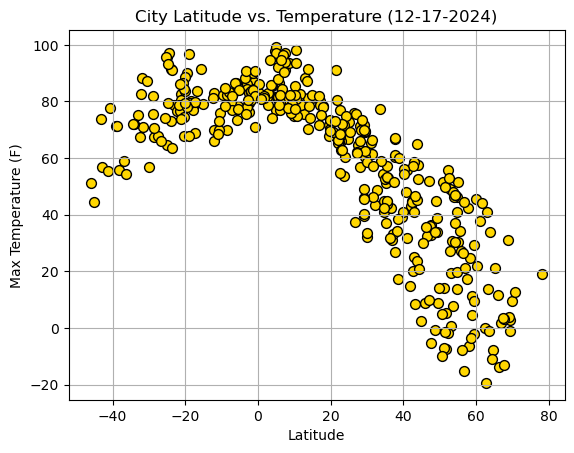

In [277]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

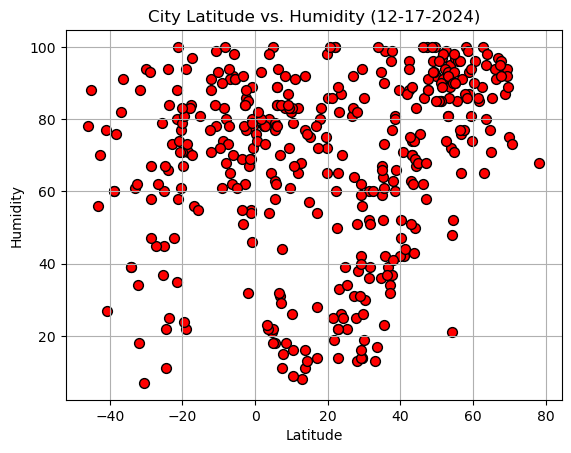

In [285]:
# Build scatter plot for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="red",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

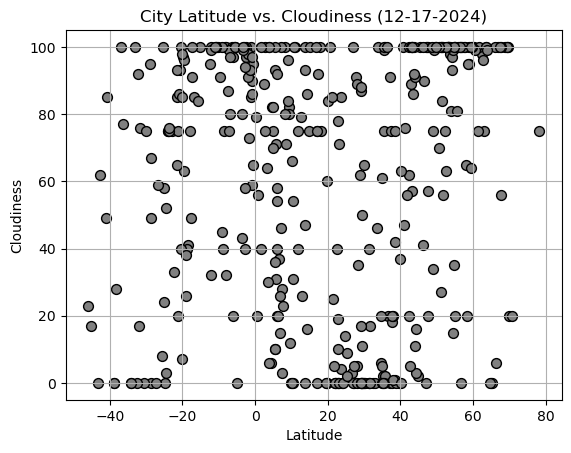

In [289]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

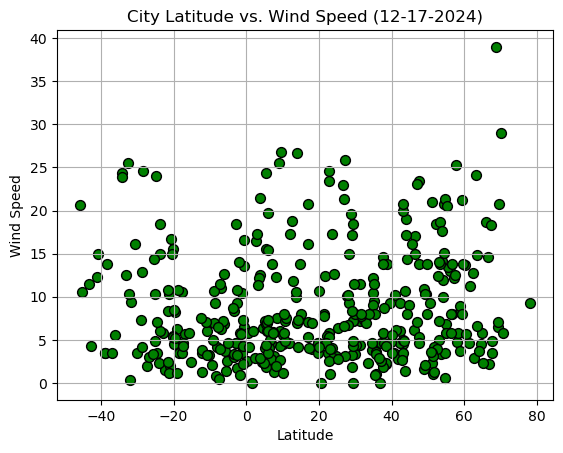

In [293]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="green",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [307]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [309]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st. john's,47.5649,-52.7093,32.79,88,20,13.80,CA,1734435839
2,bonthe,7.5264,-12.5050,91.09,44,28,1.28,SL,1734435841
3,tadmur,34.5608,38.2805,54.37,36,6,3.80,SY,1734435844
8,peretu,44.0500,25.0833,57.67,50,11,18.99,RO,1734435854
10,howrah,22.5892,88.3103,77.00,50,40,3.44,IN,1734435858


In [311]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teluknaga,-6.0989,106.6381,86.38,70,20,12.66,ID,1734435837
4,lupane,-18.9315,27.8070,96.82,22,26,6.26,ZW,1734435846
5,dunedin,-45.8742,170.5036,51.37,78,23,20.60,NZ,1734435848
6,port saint john's,-31.6229,29.5448,70.92,88,76,9.42,ZA,1734435850
7,afaahiti,-17.7500,-149.2833,77.70,84,49,10.56,PF,1734435852


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.761743344559613


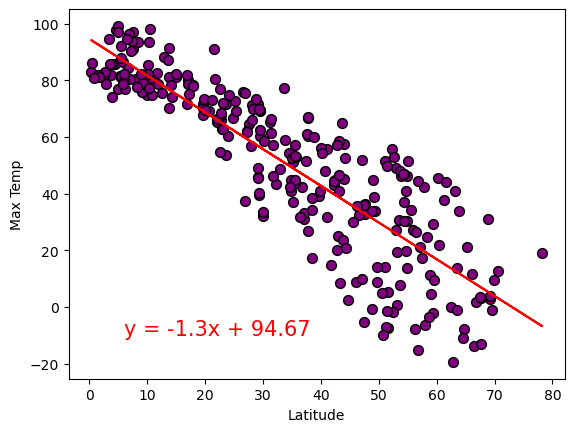

In [314]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10), "purple")

The r-value is: 0.23387267424141897


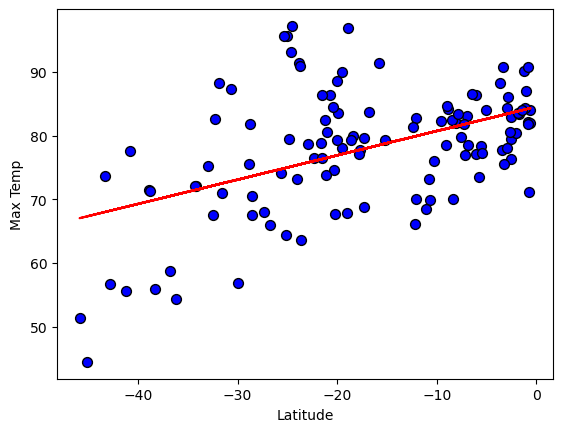

In [318]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,90), "blue")

**Discussion about the linear relationship:** The high r-value of 0.76 indicates great significance between latitude and max temperature in the northern hemisphere. For the southern hemisphere, 0.23 indicates that there was a very weak correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14001448873366787


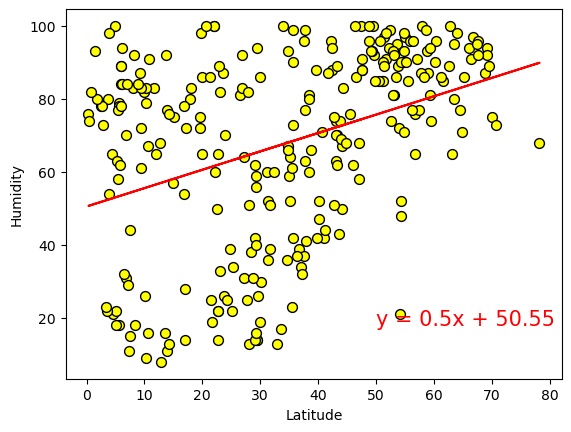

In [322]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(50,18), "yellow")

The r-value is: 0.07168677312240491


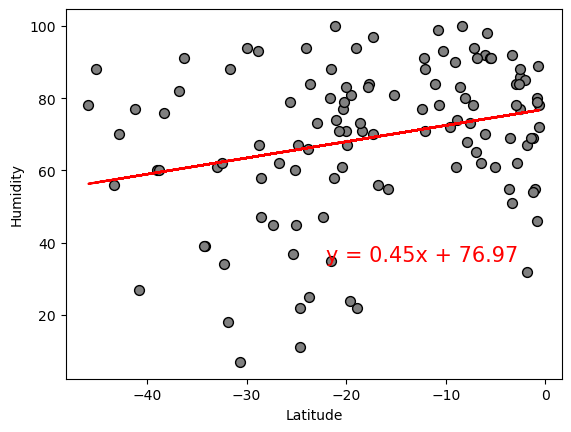

In [326]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-22,35), "gray")

**Discussion about the linear relationship:** They were both demonstrating weak to no correlation for both hemispheres based on the low r-values.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0652159213729448


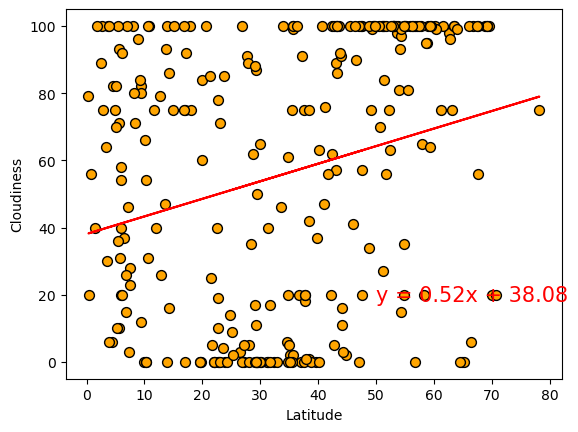

In [328]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(50,18), "orange")

The r-value is: 0.23745221257405308


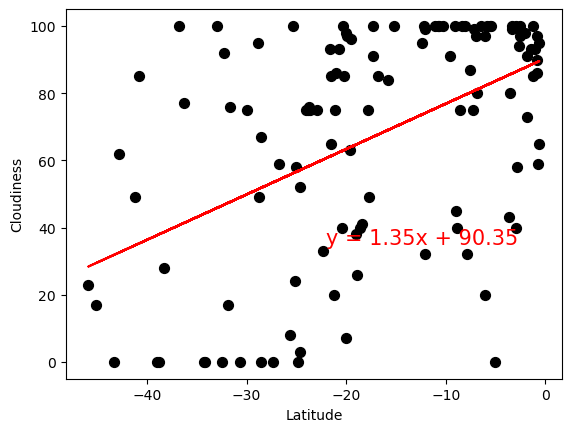

In [330]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-22,35), "black")

**Discussion about the linear relationship:** They were both demonstrating weak to no correlation for both hemispheres based on the low r-values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018600789899710212


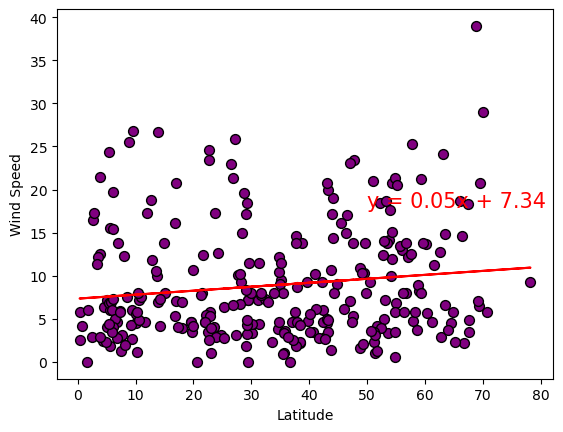

In [332]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(50,18), "purple")

The r-value is: 0.0874719107764938


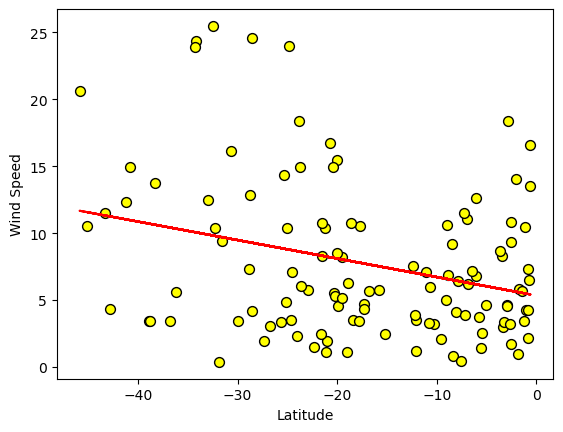

In [334]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-22,35), "yellow")

**Discussion about the linear relationship:** They were both demonstrating weak to no correlation for both hemispheres based on the low r-values.